<a href="https://colab.research.google.com/github/HEVNAGI/CSST106-CS4B/blob/main/4B_MAGPANTAY_MP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define paths
labels_path = '/content/coco.names'
weights_path = '/content/yolov3.weights'
configuration_path = '/content/yolov3.cfg'

# Load labels
labels = open(labels_path).read().strip().split('\n')
print("Labels loaded:", labels)

# Download YOLOv3 weights and configuration if not already available
!wget -q -nc https://pjreddie.com/media/files/yolov3.weights -P /content/
!wget -q -nc https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -P /content/

# Load the YOLOv3 network
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)

# Set minimum probability to eliminate weak predictions
probability_minimum = 0.6

# Set threshold for non-maximum suppression
threshold = 0.3

print("YOLOv3 model loaded successfully!")


Labels loaded: ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
YOLOv3 model loaded successfully!


In [ ]:
# Getting names of all layers
layers_names_all = network.getLayerNames()
print(layers_names_all) # list of layers' names

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [ ]:
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
# Load YOLO network
network = cv2.dnn.readNetFromDarknet(config_path, weights_path)

# Get output layers
layers_names_all = network.getLayerNames()
layers_names_output = [layers_names_all[i - 1] for i in network.getUnconnectedOutLayers()]
print(layers_names_output)
# Set parameters
probability_minimum = 0.5
threshold = 0.3

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
def yolo_detection(image_path):
    image = cv2.imread(str(image_path))
    h, w = image.shape[:2]

    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    network.setInput(blob)
    output_from_network = network.forward(layers_names_output)

    # Initialize the lists to hold results
    bounding_boxes = []
    confidences = []
    class_numbers = []

    for result in output_from_network:
        for detection in result:
            scores = detection[5:]
            class_current = np.argmax(scores)
            confidence_current = scores[class_current]

            if confidence_current > probability_minimum:
                box_current = detection[0:4] * np.array([w, h, w, h])
                x_center, y_center, box_width, box_height = box_current.astype('int')
                x_min = int(x_center - (box_width / 2))
                y_min = int(y_center - (box_height / 2))

                bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
                confidences.append(float(confidence_current))
                class_numbers.append(class_current)

    # Perform Non-Maximum Suppression
    results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

    return image, bounding_boxes, confidences, class_numbers, results if len(results) > 0 else []

In [ ]:
def draw_bounding_boxes(image, bounding_boxes, confidences, class_numbers, results):
    if len(results) > 0:
        for i in results.flatten():
            x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
            box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

            colour_box_current = [int(j) for j in np.random.randint(0, 255, size=3)]

            cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height),
                          colour_box_current, 2)

            text_box_current = f'{labels[int(class_numbers[i])]}: {confidences[i]:.4f}'

            cv2.putText(image, text_box_current, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, colour_box_current, 2)

    return image

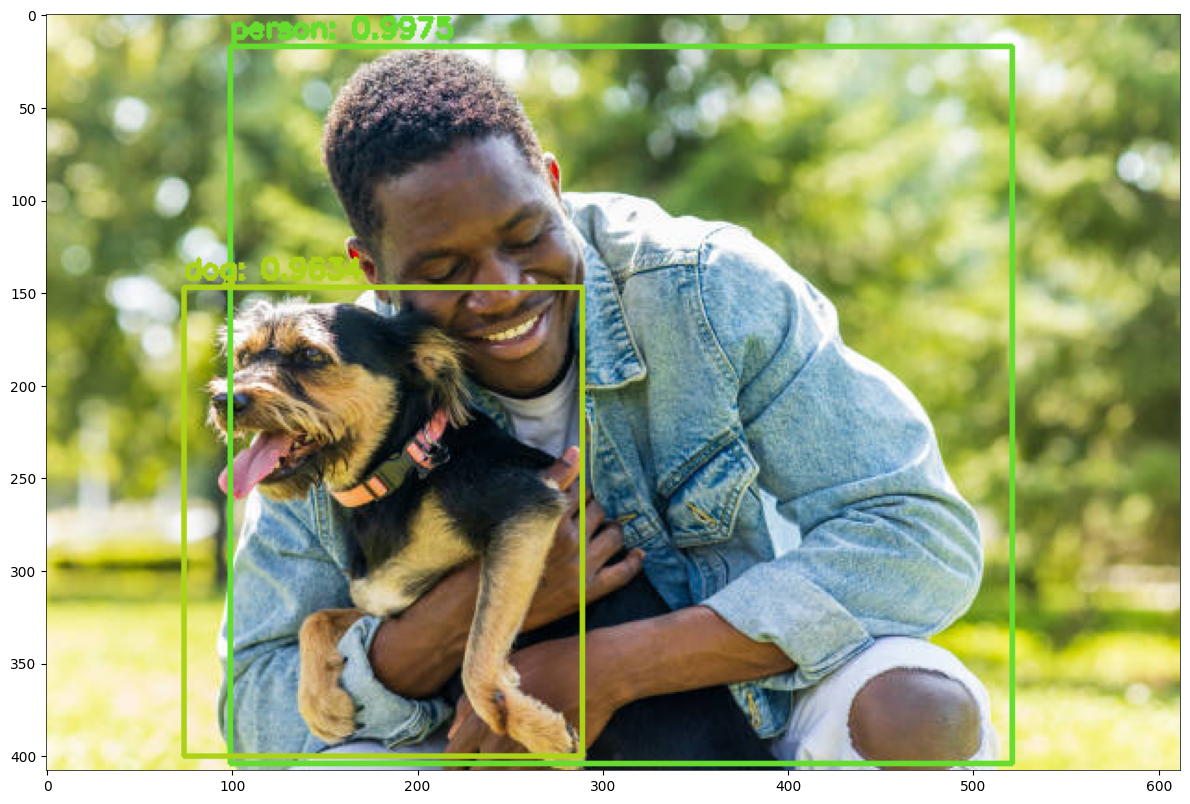

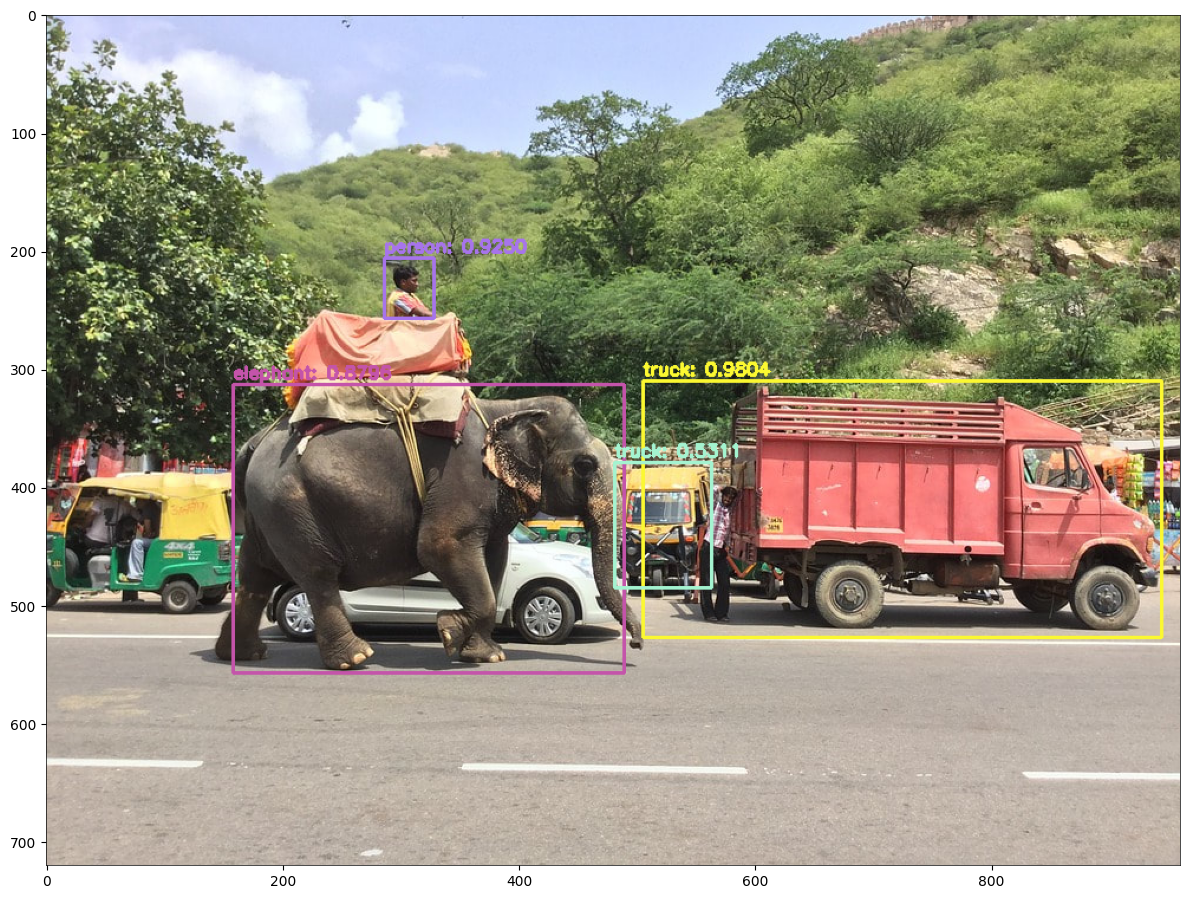

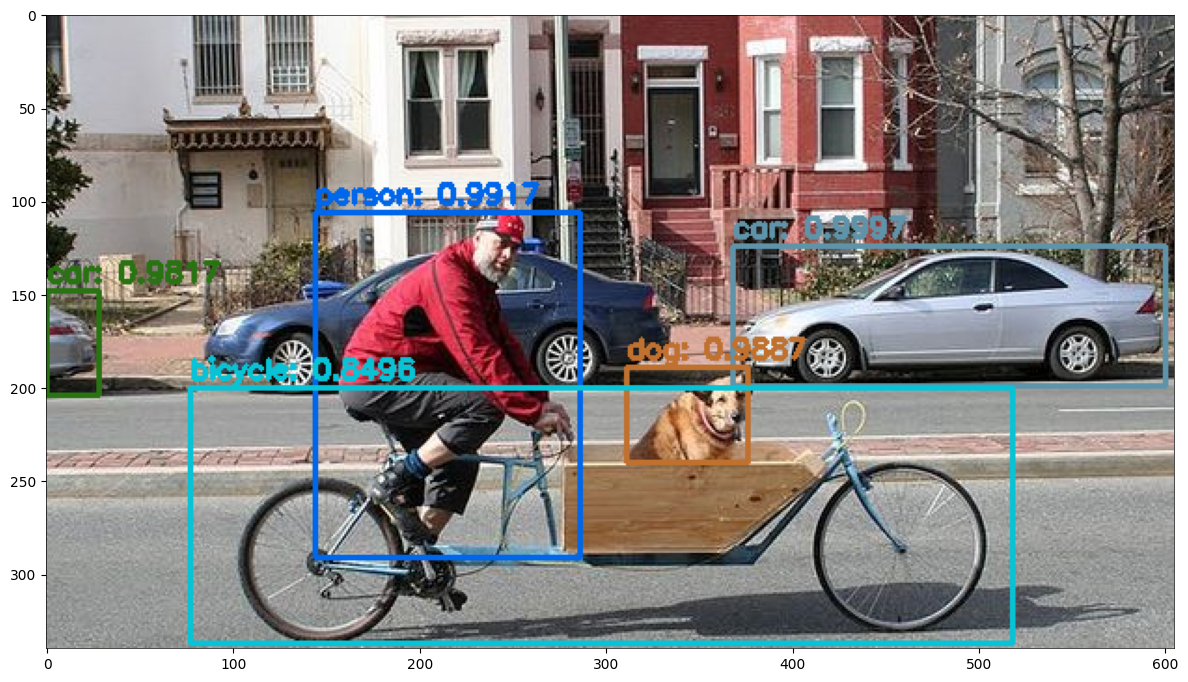

In [ ]:
#Data Preparation: Preprocess the dataset by resizing images, normalizing pixel values, and, if necessary, labeling bounding boxes for objects.

# Set path and get image files
image_path = Path("/content/drive/MyDrive/dataset_directory")
image_files = list(image_path.glob("*.jpg")) + list(image_path.glob("*.jpeg"))

# Randomly select 5 images
selected_images = random.sample(image_files, min(5, len(image_files)))

# Process and display images one by one
for i, image_file in enumerate(selected_images, 1):
    # Perform YOLO detection
    image, bounding_boxes, confidences, class_numbers, results = yolo_detection(image_file)

    # Draw bounding boxes
    image_with_boxes = draw_bounding_boxes(image, bounding_boxes, confidences, class_numbers, results)

    # Create a figure for this image
    plt.figure(figsize=(12, 10))

    # Display the image
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))

    # Add a thin border around the image
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['top'].set_linewidth(0.5)
    plt.gca().spines['right'].set_linewidth(0.5)
    plt.gca().spines['bottom'].set_linewidth(0.5)
    plt.gca().spines['left'].set_linewidth(0.5)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()